# Задание 1. Первичный анализ данных c Pandas

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index', dtype=float)

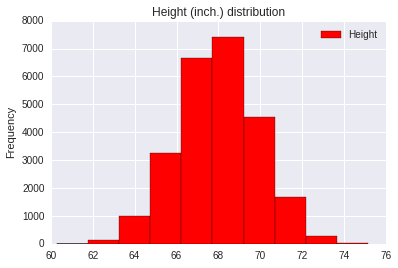

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [4]:
data.head(n=5)

Height    Weight
Index                    
1.0    65.78331  112.9925
2.0    71.51521  136.4873
3.0    69.39874  153.0269
4.0    68.21660  142.3354
5.0    67.78781  144.2971

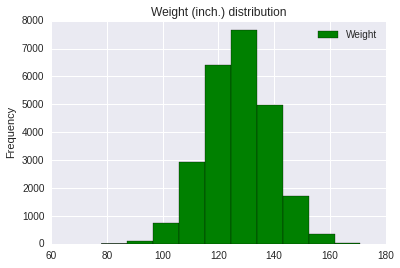

In [5]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (inch.) distribution')

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [9]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


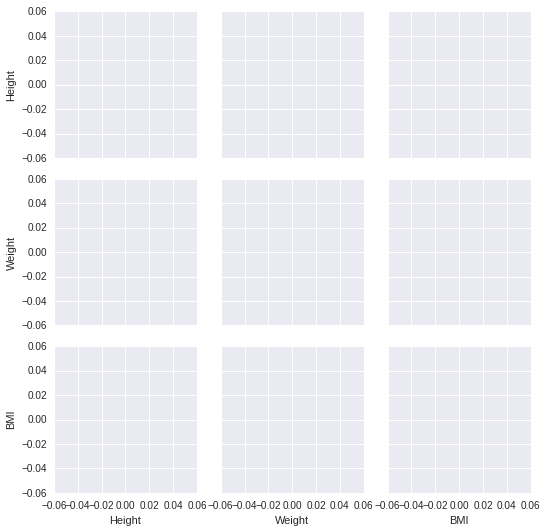

In [10]:
sns_plot = sns.pairplot(data)

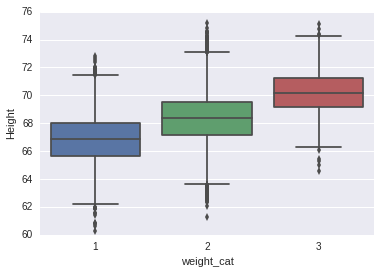

In [17]:
def weight_category(weight):
    pass
    if weight < 120:
        return 1;
    if weight >= 150:
        return 3;
    if (weight >= 120) and (weight < 150):
        return 2;
data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x="weight_cat", y="Height", data=data)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


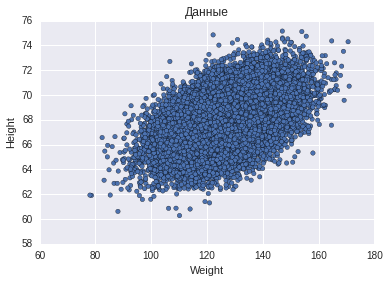

In [19]:
data.plot(x='Weight', y='Height', kind='scatter', title = 'Данные')

# Задание 2. Минимизация квадратичной ошибки

In [24]:
def error(w0, w1):
    pass
    a = float(0)
    for i in range(1, 25001):
        a = a + (float(data['Height'][i]) - w0 - w1*float(data['Weight'][i]))**2
    return(a)

In [25]:
x = np.linspace(60, 180, 50)

In [26]:
w0 = 60
w1 = 0.05
y = w0 + w1 * x
w0 = 50
w1 = 0.16
y1 = w0 + w1 * x

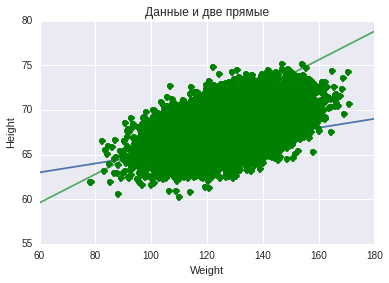

In [27]:
plt.plot(x,y, x,y1, data['Weight'], data['Height'], 'go')
plt.xlabel('Weight')    # обозначение оси абсцисс
plt.ylabel('Height')    # обозначение оси ординат
plt.title('Данные и две прямые') 

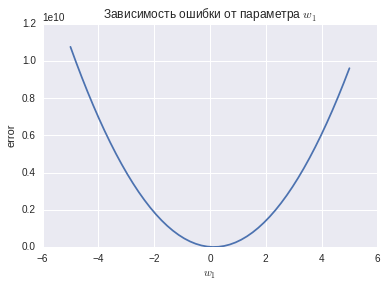

In [28]:
w0 = 50
w1 = np.linspace(-5, 5, 50)
y = error(w0, w1)
plt.plot(w1, y)
plt.xlabel('$w_1$')    # обозначение оси абсцисс
plt.ylabel('error')  
plt.title('Зависимость ошибки от параметра $w_1$') 

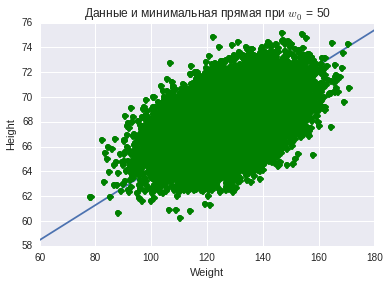

In [29]:
def error50(w1):
    return(error(50, w1))
opt = sc.optimize.minimize_scalar(error50, bounds=(-5, 5), method='bounded')
y = w0 + opt.x * x
plt.plot(x,y, data['Weight'], data['Height'], 'go')
plt.xlabel('Weight')    # обозначение оси абсцисс
plt.ylabel('Height')    # обозначение оси ординат
plt.title('Данные и минимальная прямая при $w_0$ = 50') 

In [30]:
from mpl_toolkits.mplot3d import Axes3D

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


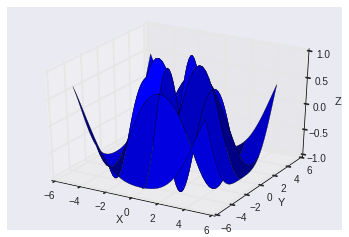

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


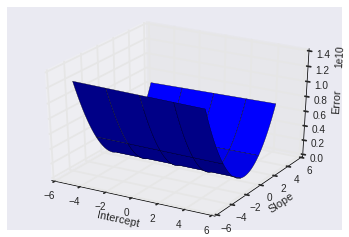

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(X,Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [33]:
def error(w):
    pass
    a = float(0)
    for i in range(1, 25001):
        a = a + (float(data['Height'][i]) - w[0] - w[1]*float(data['Weight'][i]))**2
    return(a)
opt = sc.optimize.minimize(error, (0,0), method='L-BFGS-B')

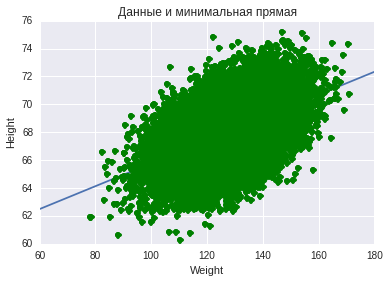

In [34]:
y = opt.x[0] + opt.x[1] * x
plt.plot(x,y, data['Weight'], data['Height'], 'go')
plt.xlabel('Weight')    # обозначение оси абсцисс
plt.ylabel('Height')    # обозначение оси ординат
plt.title('Данные и минимальная прямая') 